In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Koushik\\Downloads\\fandango_scrape.csv')
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [4]:
df.shape

(510, 4)

In [5]:
df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


In [6]:
df =df.rename(columns={'STARS' :'stars','RATING':'rating','VOTES':'votes'})

<Axes: xlabel='rating', ylabel='votes'>

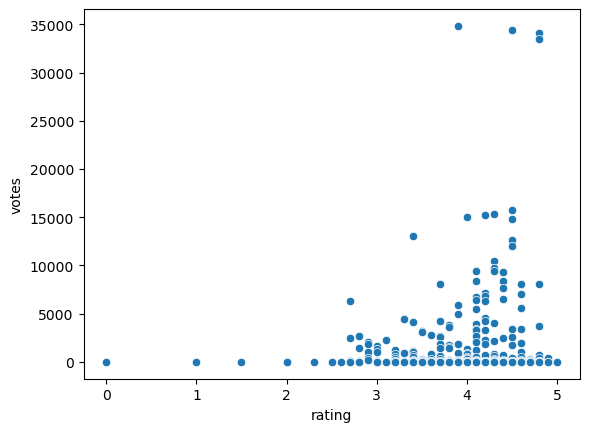

In [7]:
sns.scatterplot(x ='rating',y ='votes',data = df)

In [8]:
df.corr(numeric_only=True)

,stars,rating,votes
stars,1.000000,0.994870,0.165774
rating,0.994870,1.000000,0.165147
votes,0.165774,0.165147,1.000000


In [9]:
title = 'new movie(year)'

In [10]:
title.split('(')[-1].replace(')','')

'year'

In [34]:
df['year'] = df['FILM'].apply(lambda x:x.split('(')[-1].replace(')',''))

In [36]:
df.head()

,FILM,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [38]:
title[-6:-1]

'(year'

<Axes: xlabel='year', ylabel='count'>

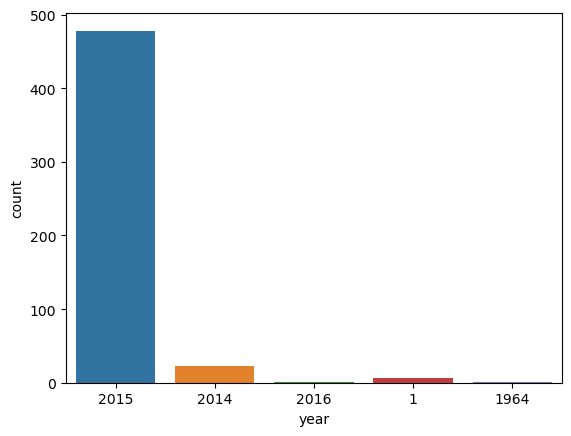

In [40]:
sns.countplot(x = 'year',data=df,hue='year')

In [42]:
df.nlargest(10,'votes')

,FILM,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [44]:
no_votes = df['votes'] ==0

In [46]:
df[df['votes'] ==0]

,FILM,stars,rating,votes,year
437,6 Years (2015),0.0,0.0,0,2015
438,7 Minutes (2015),0.0,0.0,0,2015
439,A Year in Champagne (2015),0.0,0.0,0,2015
440,Balls Out (2015),0.0,0.0,0,2015
441,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [48]:
no_votes.sum()

73

In [50]:
fan_review = df[df['votes']>0]

In [52]:
fan_review.head()

,FILM,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


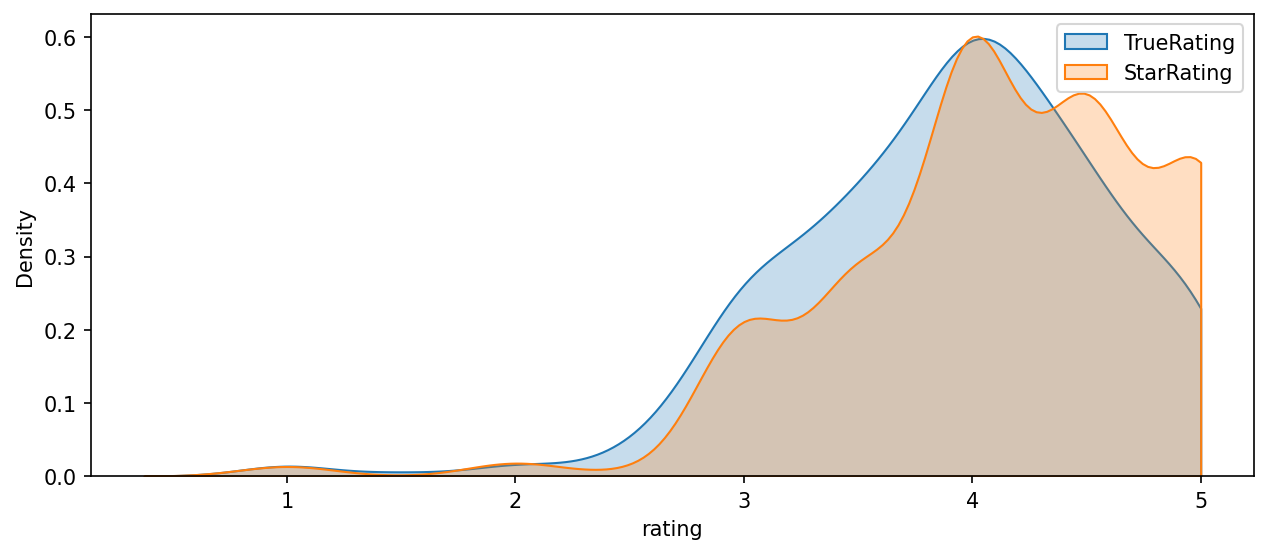

In [54]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_review,x ='rating',clip=[0,5],fill=True,label ='TrueRating')
sns.kdeplot(data=fan_review,x ='stars',clip=[0,5],fill=True,label ='StarRating')
plt.legend(loc='best')

In [55]:
fan_review['star_diff'] = fan_review['stars'] - fan_review['rating']

In [58]:
fan_review['star_diff'] = fan_review['star_diff'].round(2)

In [60]:
fan_review.head()

,FILM,stars,rating,votes,year,star_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [62]:
fan_review['star_diff'].unique()

array([0.1, 0. , 0.2, 0.3, 0.5, 0.4, 1. ])

<Axes: xlabel='star_diff', ylabel='count'>

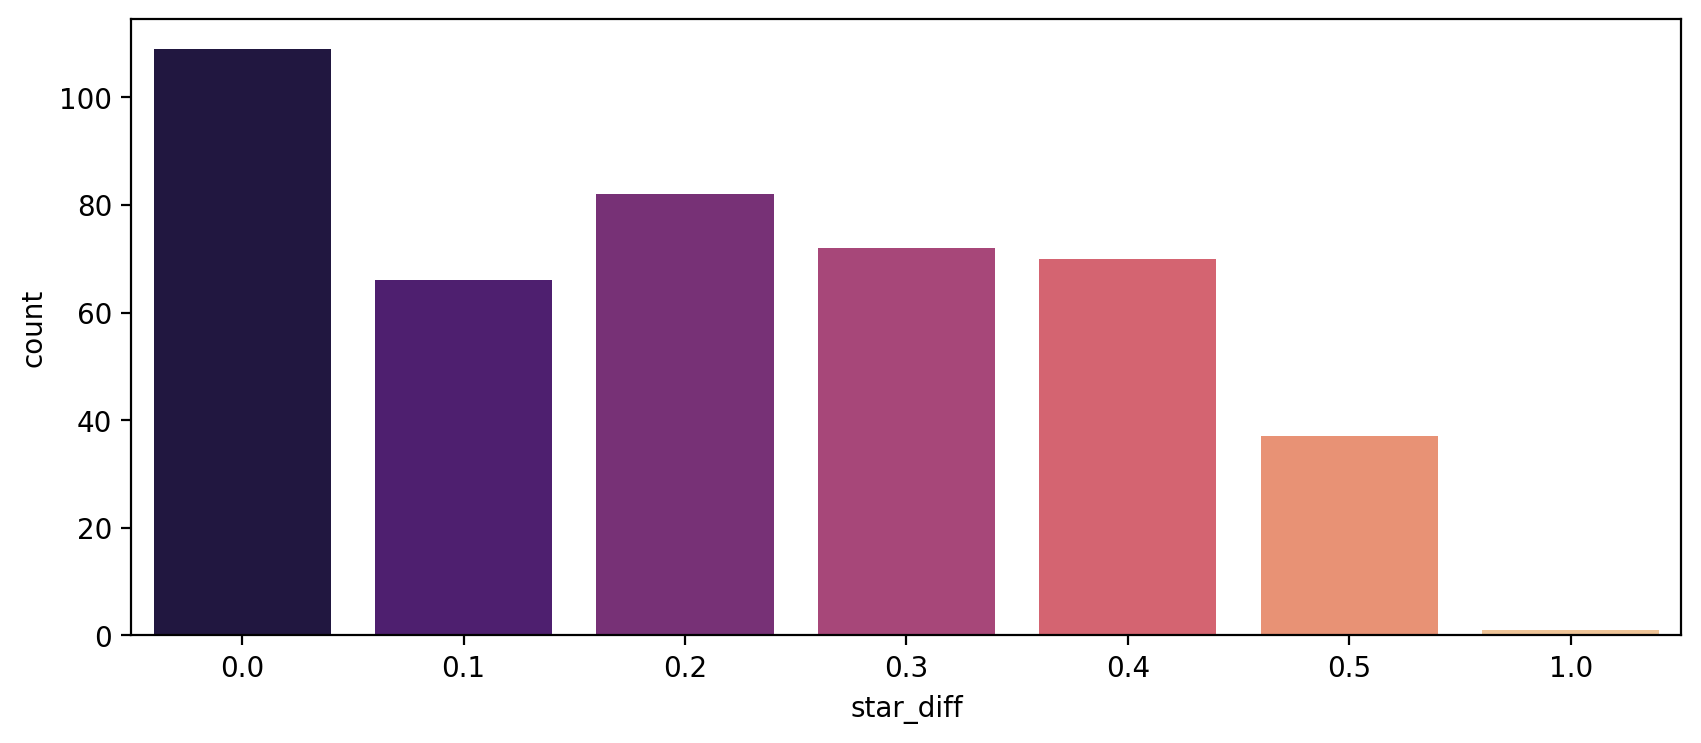

In [64]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data = fan_review,x ='star_diff',palette='magma')

In [66]:
fan_review[fan_review['star_diff'] ==1]

,FILM,stars,rating,votes,year,star_diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [68]:
data = pd.read_csv('C:\\Users\\Koushik\\OneDrive\\Desktop\\all_sites_scores.csv')

In [70]:
data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [72]:
data.shape

(146, 8)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [76]:
data.isnull().sum()

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
dtype: int64

In [78]:
data.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

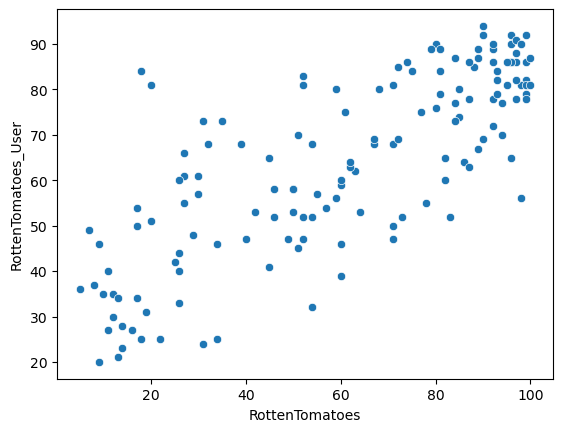

In [80]:
sns.scatterplot(data = data,x ='RottenTomatoes',y ='RottenTomatoes_User')

In [82]:
data['rottendiff'] = data['RottenTomatoes'] - data['RottenTomatoes_User']

In [84]:
data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rottendiff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [86]:
data['rottendiff'].apply(abs).mean()

15.095890410958905

<Axes: xlabel='rottendiff', ylabel='Count'>

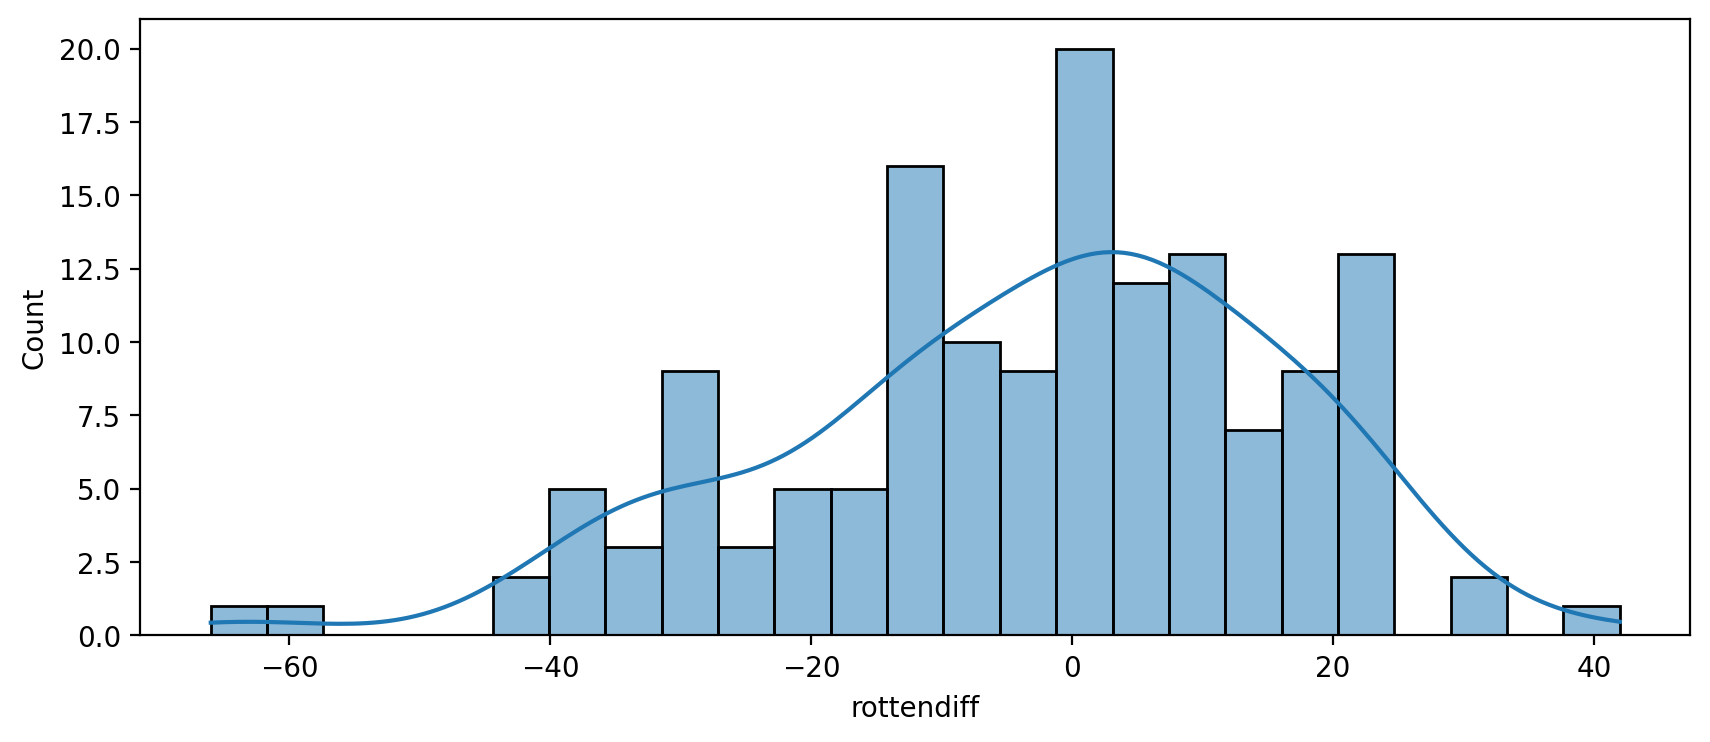

In [88]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = data ,x ='rottendiff',kde=True,bins=25)

<Axes: xlabel='rottendiff', ylabel='Count'>

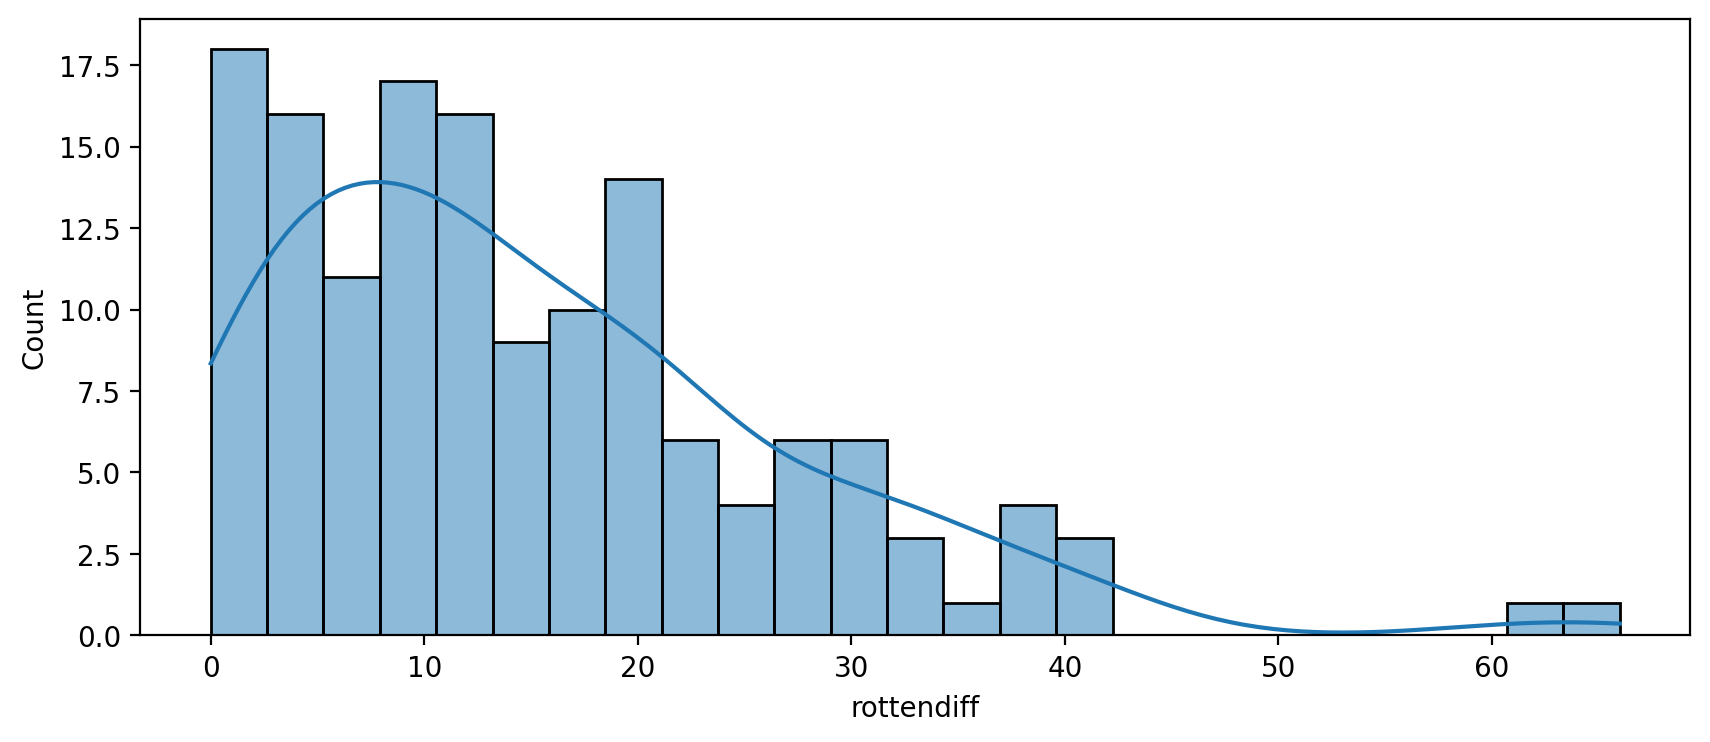

In [90]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x =data['rottendiff'].apply(abs),kde=True,bins=25)

In [92]:
data.nsmallest(5,'rottendiff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [94]:
data.nlargest(5,'rottendiff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

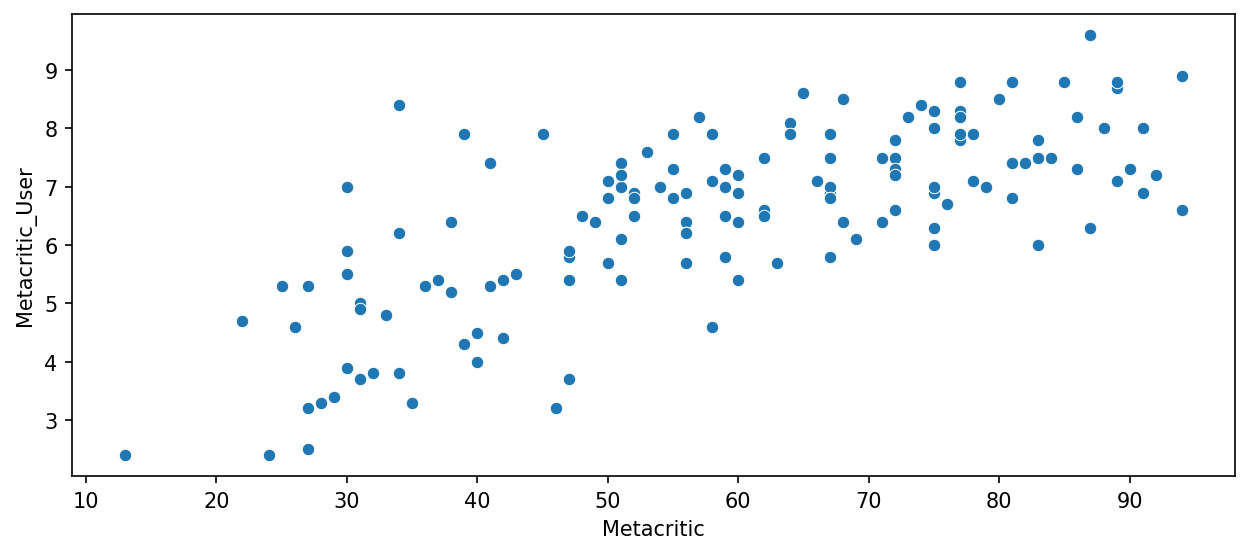

In [96]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=data,x = 'Metacritic',y ='Metacritic_User')

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

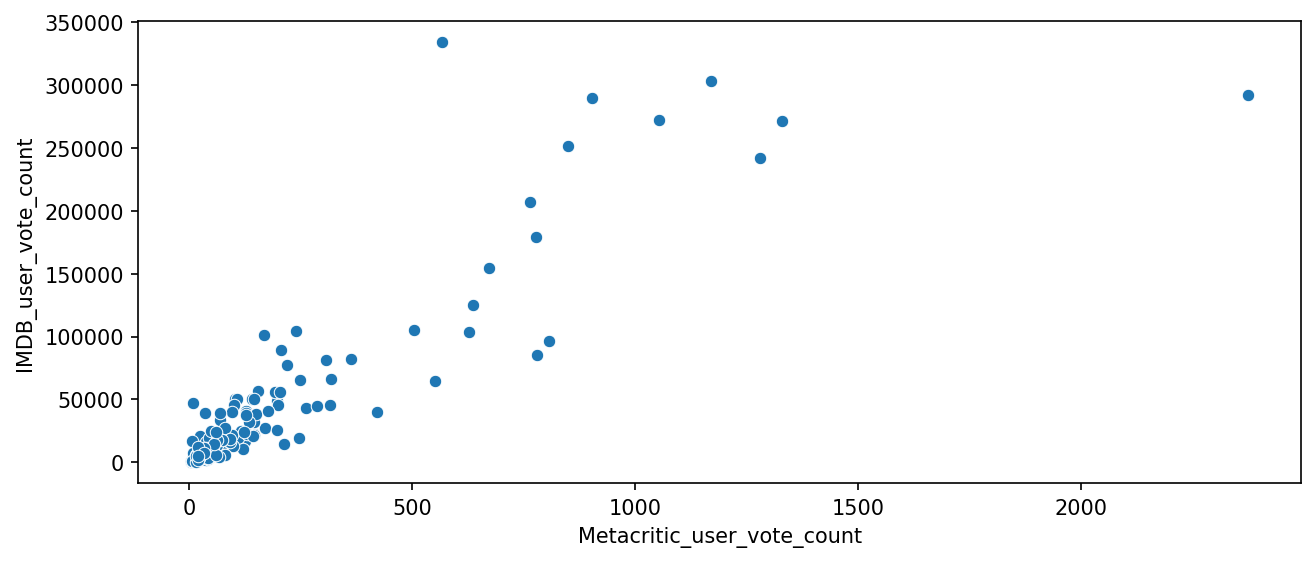

In [98]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data =data ,x ='Metacritic_user_vote_count' ,y = 'IMDB_user_vote_count')

In [100]:
data.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rottendiff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [102]:
data.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rottendiff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [104]:
df_com = pd.merge(df,data,on='FILM',how='inner')

In [107]:
df_com.head()

,FILM,stars,rating,votes,year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rottendiff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [109]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   stars                       145 non-null    float64
 2   rating                      145 non-null    float64
 3   votes                       145 non-null    int64  
 4   year                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  rottendiff                  145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [113]:
import numpy as np
df_com['RT_norm'] = np.round(df_com['RottenTomatoes']/20,1)
df_com['RT_unorm'] = np.round(df_com['RottenTomatoes_User']/20,1)
df_com['M_norm'] = np.round(df_com['Metacritic']/20,1)
df_com['M_unorm'] = np.round(df_com['Metacritic_User']/20,1)
df_com['norm'] = np.round(df_com['IMDB']/20,1)

In [115]:
df_com.head()

,FILM,stars,rating,votes,year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rottendiff,RT_norm,RT_unorm,M_norm,M_unorm,norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,0.2,0.2
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,0.4,0.4
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,0.3,0.4
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,0.3,0.4
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,0.4,0.4


In [117]:
df_com.columns

Index(['FILM', 'stars', 'rating', 'votes', 'year', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'rottendiff',
       'RT_norm', 'RT_unorm', 'M_norm', 'M_unorm', 'norm'],
      dtype='object')

In [129]:
norm_scores = df_com[['stars', 'rating','RT_norm', 'RT_unorm', 'M_norm', 'M_unorm', 'norm']]

In [131]:
norm_scores.head()

,stars,rating,RT_norm,RT_unorm,M_norm,M_unorm,norm
0,4.0,3.9,1.2,2.1,2.3,0.2,0.2
1,4.5,4.5,3.6,4.0,3.0,0.4,0.4
2,5.0,4.8,3.6,4.2,3.6,0.3,0.4
3,5.0,4.8,4.0,4.2,3.4,0.3,0.4
4,4.5,4.5,4.9,4.5,4.7,0.4,0.4


<Axes: ylabel='Density'>

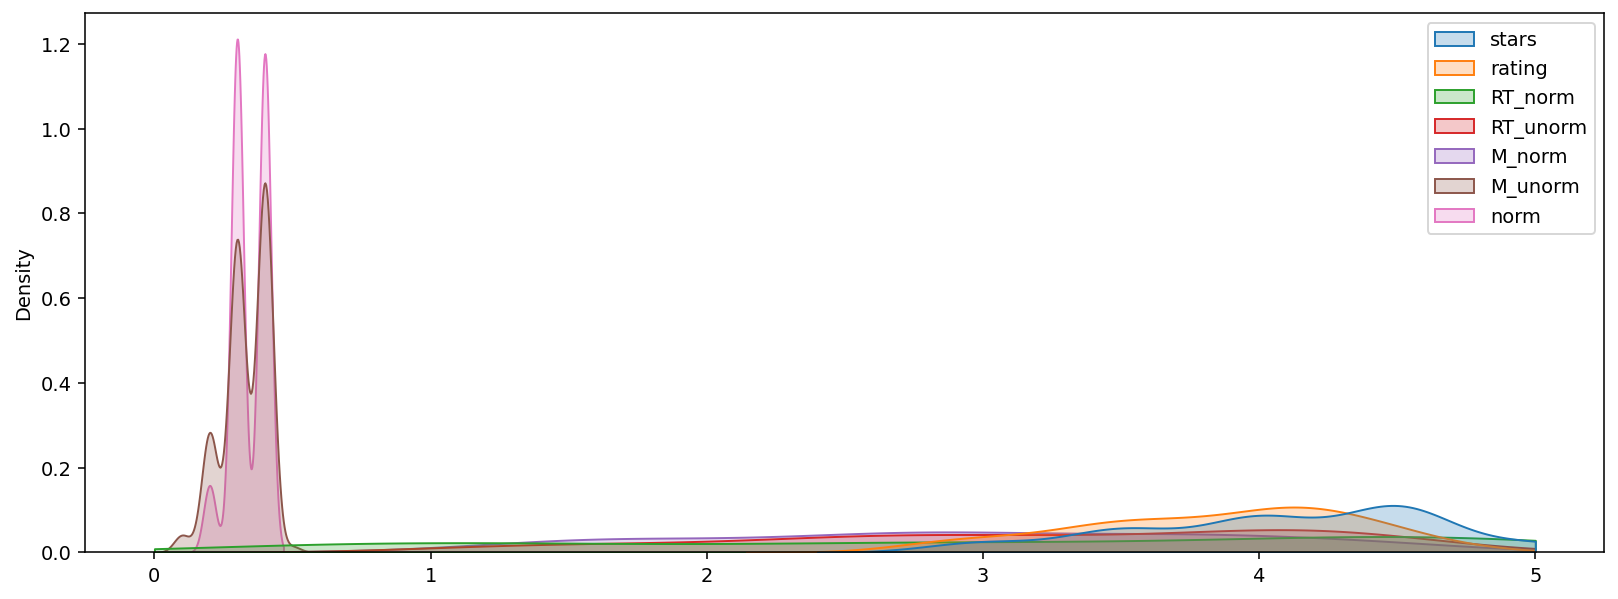

In [137]:
plt.figure(figsize=(14,5),dpi=140)
sns.kdeplot(data = norm_scores,shade =True,clip =[0,5])


<Axes: ylabel='Density'>

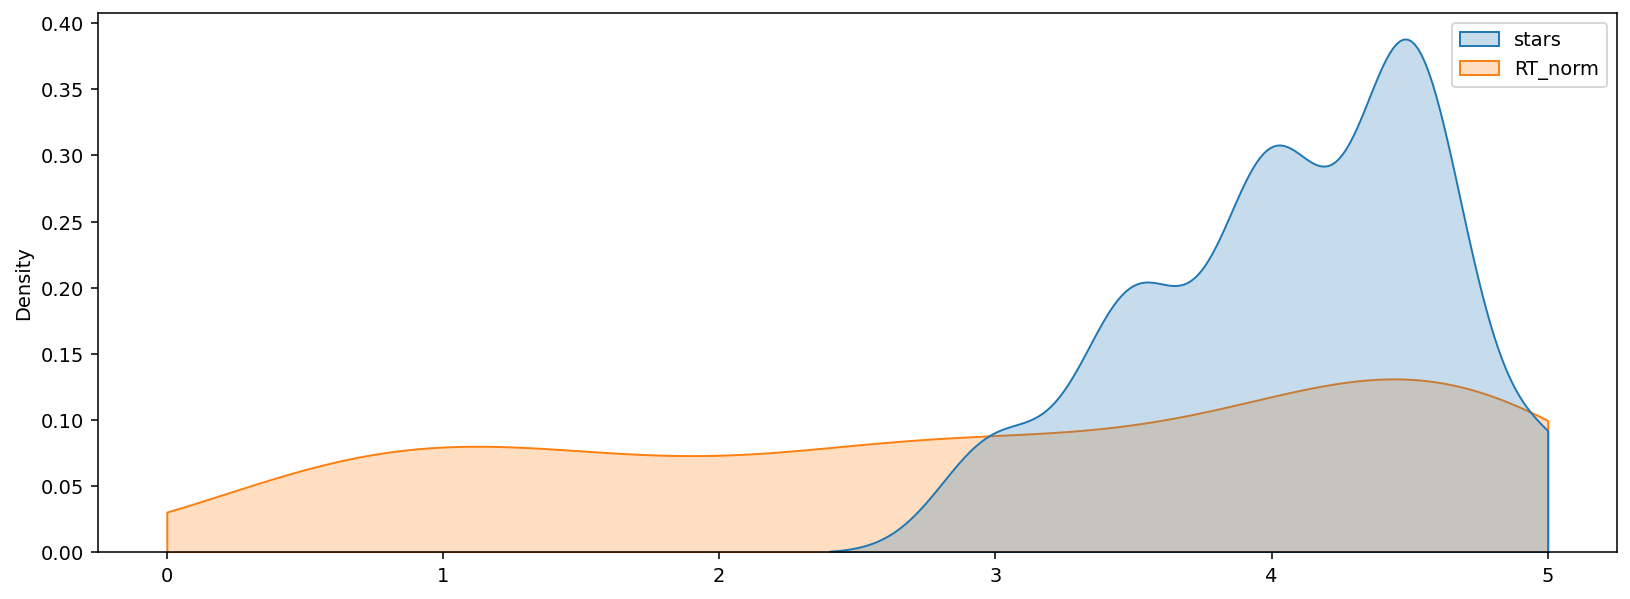

In [141]:
plt.figure(figsize=(14,5),dpi=140)
sns.kdeplot(data = norm_scores[['stars','RT_norm']],shade =True,clip =[0,5])

<Axes: ylabel='Count'>

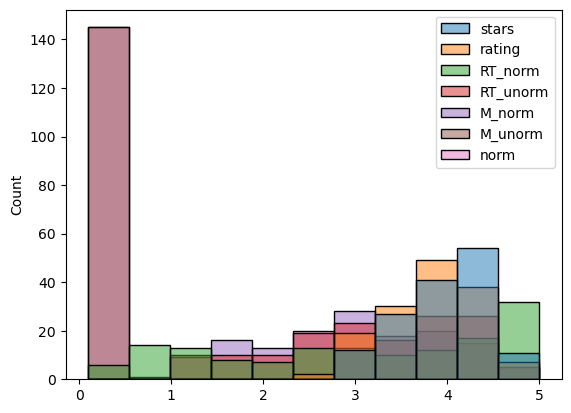

In [143]:
sns.histplot(data = norm_scores)

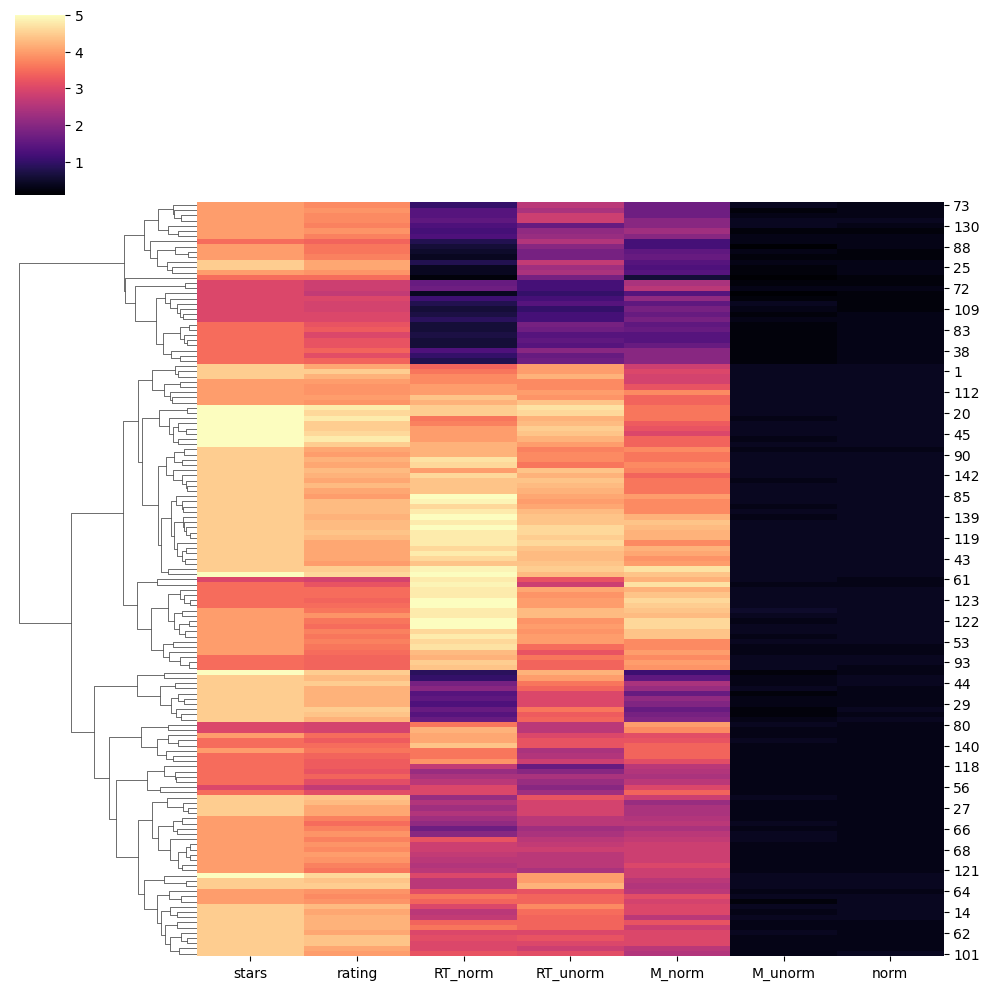

In [145]:
sns.clustermap(data = norm_scores,cmap='magma',col_cluster=False)

In [147]:
norm_films = df_com[['FILM','stars', 'rating','RT_norm', 'RT_unorm', 'M_norm', 'M_unorm', 'norm']]

In [149]:
worst_films = norm_films.nsmallest(10,'RT_norm')

,FILM,stars,rating,RT_norm,RT_unorm,M_norm,M_unorm,norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,0.1,0.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,0.2,0.3
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,0.1,0.2
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,0.2,0.2
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,0.2,0.3
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,0.3,0.2
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,0.2,0.3
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,0.2,0.3
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,0.2,0.3
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,0.2,0.3


<Axes: ylabel='Density'>

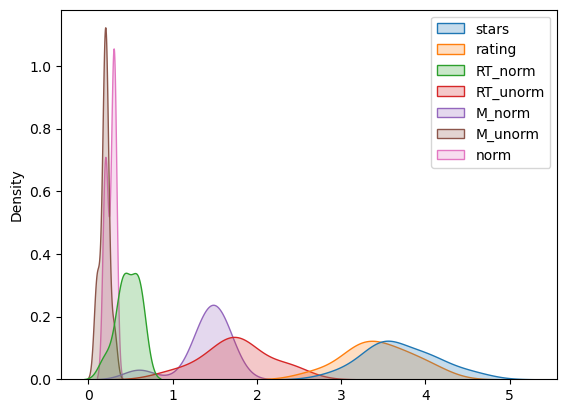

In [151]:
sns.kdeplot(data = worst_films,shade=True)

In [153]:
best_films = norm_films.nlargest(10,'RT_norm')

In [157]:
best_films

,FILM,stars,rating,RT_norm,RT_unorm,M_norm,M_unorm,norm
23,Selma (2014),5.0,4.6,5.0,4.3,4.4,0.4,0.4
85,Shaun the Sheep Movie (2015),4.5,4.0,5.0,4.1,4.0,0.4,0.4
122,Timbuktu (2015),4.0,3.6,5.0,3.9,4.6,0.3,0.4
123,Phoenix (2015),3.5,3.4,5.0,4.0,4.6,0.4,0.4
124,Song of the Sea (2014),4.5,4.3,5.0,4.6,4.3,0.4,0.4
126,Leviathan (2014),4.0,3.5,5.0,4.0,4.6,0.4,0.4
128,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,5.0,4.0,4.5,0.4,0.4
139,Seymour: An Introduction (2015),4.5,4.2,5.0,4.4,4.2,0.3,0.4
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,0.4,0.4
39,Paddington (2015),4.5,4.3,4.9,4.0,3.8,0.4,0.4
